In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fixed rp/n

In [14]:
r=np.load('exp_results/r.npy')
df1=pd.DataFrame(r)
df1.columns=['r','NMSE_mean','NMSE_se','time_mean','time_se','ALS','ALS_time','SiLRTC','SiLRTC_time'
             ,'TNCP','TNCP_time']
dfa,dfb,dfc = df1[['r','NMSE_mean','time_mean']].copy(),df1[['r','ALS','ALS_time']].copy(),df1[['r','SiLRTC','SiLRTC_time']].copy()
dfd=df1[['r','TNCP','TNCP_time']].copy()
dfb.columns,dfc.columns,dfd.columns=['r','NMSE_mean','time_mean'],['r','NMSE_mean','time_mean'],['r','NMSE_mean','time_mean']
dfa.loc[:,'Algorithm'],dfb.loc[:,'Algorithm'],dfc.loc[:,'Algorithm'],dfd.loc[:,'Algorithm']='BCG','ALS','SiLRTC','TNCP'
df1=pd.concat([dfa,dfb,dfc,dfd])

FileNotFoundError: [Errno 2] No such file or directory: 'exp_results/r.npy'

In [16]:
als1,als2,bcg1,bcg2,si1,si2,tncp1,tncp2=[],[],[],[],[],[],[],[]
als3,als4,bcg3,bcg4,si3,si4,tncp3,tncp4=[],[],[],[],[],[],[],[]
rs=[10,20,30,40,50,60,70,80,90,100]
for r in rs:
    array = np.load(f'results/r/r_als{r}.npy')
    als1.append(np.mean(array[:,0]))
    als2.append(np.mean(array[:,1]))
    als3.append(np.std(array[:,0])/10)
    als4.append(np.std(array[:,1])/10)

    array = np.load(f'results/r/r_gt{r}.npy')
    bcg1.append(np.mean(array[:,0]))
    bcg2.append(np.mean(array[:,1]))
    bcg3.append(np.std(array[:,0])/10)
    bcg4.append(np.std(array[:,1])/10)

    array = np.load(f'results/r/r_si{r}.npy')
    si1.append(np.mean(array[:,0]))
    si2.append(np.mean(array[:,1]))
    si3.append(np.std(array[:,0])/10)
    si4.append(np.std(array[:,1])/10)

    array = np.load(f'results/r/r_tncp{r}.npy')
    tncp1.append(np.mean(array[:,0]))
    tncp2.append(np.mean(array[:,1]))
    tncp3.append(np.std(array[:,0])/10)
    tncp4.append(np.std(array[:,1])/10)
df1=pd.DataFrame({'r':rs,
                 'NMSE_mean':bcg1,
                 'NMSE_se':bcg3,
                 'time_mean':bcg2,
                 'time_se':bcg4})
df1['Algorithm']='BCG'

df2=pd.DataFrame({'r':rs,
                 'NMSE_mean':als1,
                 'NMSE_se':als3,
                 'time_mean':als2,
                 'time_se':als4})
df2['Algorithm']='ALS'

df3=pd.DataFrame({'r':rs,
                 'NMSE_mean':si1,
                 'NMSE_se':si3,
                 'time_mean':si2,
                 'time_se':si4})
df3['Algorithm']='SiLRTC'

df4=pd.DataFrame({'r':rs,
                 'NMSE_mean':tncp1,
                 'NMSE_se':tncp3,
                 'time_mean':tncp2,
                 'time_se':tncp4})
df4['Algorithm']='TNCP'
df= pd.concat([df1,df2,df3,df4])

FileNotFoundError: [Errno 2] No such file or directory: 'results/r/r_als10.npy'

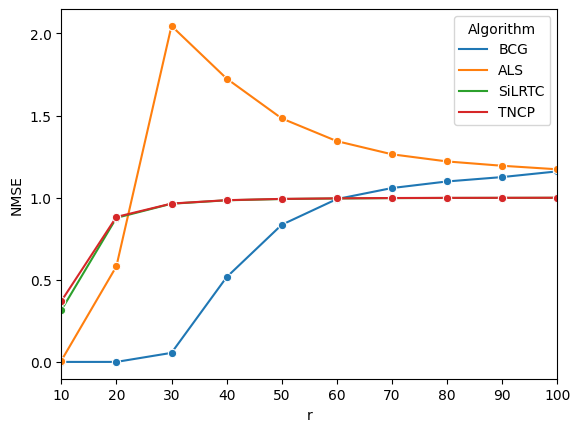

In [97]:
x=sns.lineplot(data=df,x='r',y='NMSE_mean',hue='Algorithm',marker='o')
x.set_xlabel('r')
x.set_ylabel('NMSE')
x.set_xlim(10, 100)
x.xaxis.set_major_locator(ticker.MultipleLocator(10))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
#x.set_title('NMSE vs r (r*r*r and N=500)')

In [98]:
fig=x.get_figure()
fig.savefig('fig_1a')

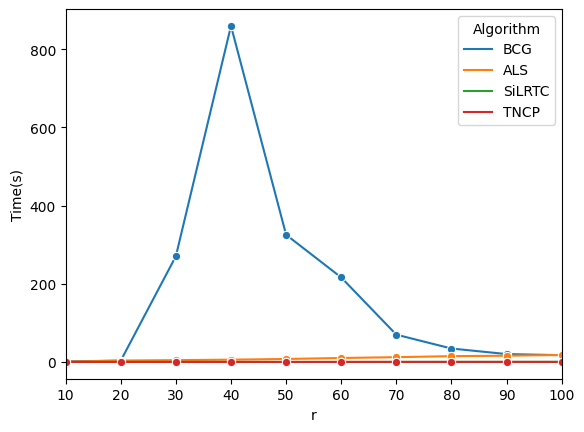

In [99]:
x=sns.lineplot(data=df,x='r',y='time_mean',hue='Algorithm',marker='o')
x.set_xlabel('r')
x.set_ylabel('Time(s)')
x.set_xlim(10, 100)
x.xaxis.set_major_locator(ticker.MultipleLocator(10))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
#x.set_title('NMSE vs r (r*r*r and N=500)')

In [100]:
fig=x.get_figure()
fig.savefig('fig_1e')

In [53]:
p=np.load('exp_results/p.npy')
df1=pd.DataFrame(p)
df1.columns=['p','NMSE_mean','NMSE_se','time_mean','time_se','ALS','ALS_time','SiLRTC','SiLRTC_time','TNCP','TNCP_time']
dfa,dfb,dfc = df1[['p','NMSE_mean','time_mean']].copy(),df1[['p','ALS','ALS_time']].copy(),df1[['p','SiLRTC','SiLRTC_time']].copy()
dfd=df1[['p','TNCP','TNCP_time']].copy()
dfb.columns,dfc.columns,dfd.columns=['p','NMSE_mean','time_mean'],['p','NMSE_mean','time_mean'],['p','NMSE_mean','time_mean']
dfa.loc[:,'Algorithm'],dfb.loc[:,'Algorithm'],dfc.loc[:,'Algorithm'],dfd.loc[:,'Algorithm']='BCG','ALS','SiLRTC','TNCP'
df1=pd.concat([dfa,dfb,dfc,dfd])

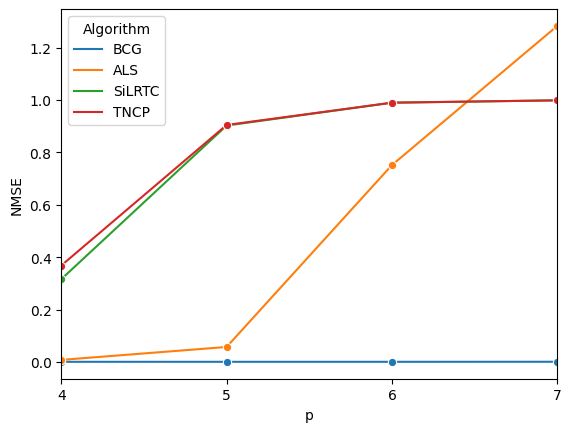

In [54]:
x=sns.lineplot(data=df1,x='p',y='NMSE_mean',hue='Algorithm',marker='o')
x.set_xlabel('p')
x.set_ylabel('NMSE')
x.set_xlim(4, 7)
x.xaxis.set_major_locator(ticker.MultipleLocator(1))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
#x.set_title('NMSE vs p (10^p and N=10000)')

In [55]:
fig=x.get_figure()
fig.savefig('fig_1b')

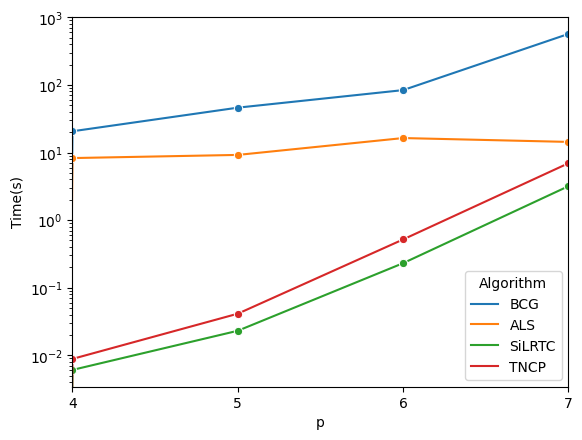

In [56]:
x=sns.lineplot(data=df1,x='p',y='time_mean',hue='Algorithm',marker='o')
x.set_xlabel('p')
x.set_ylabel('Time(s)')
x.set_xlim(4, 7)
x.xaxis.set_major_locator(ticker.MultipleLocator(1))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.yscale('log')
#x.set_title('Time vs p (10^p and N=10000)')


In [57]:
fig=x.get_figure()
fig.savefig('fig_1f')

In [58]:
p=np.load('exp_results/percent_1.npy')
df1=pd.DataFrame(p)
df1.columns=['percent','NMSE_mean','NMSE_se','time_mean','time_se','ALS','ALS_time','SiLRTC','SiLRTC_time','TNCP','TNCP_time']
dfa,dfb,dfc = df1[['percent','NMSE_mean','time_mean']].copy(),df1[['percent','ALS','ALS_time']].copy(),df1[['percent','SiLRTC','SiLRTC_time']].copy()
dfd=df1[['percent','TNCP','TNCP_time']].copy()
dfb.columns,dfc.columns,dfd.columns=['percent','NMSE_mean','time_mean'],['percent','NMSE_mean','time_mean'],['percent','NMSE_mean','time_mean']
dfa.loc[:,'Algorithm'],dfb.loc[:,'Algorithm'],dfc.loc[:,'Algorithm'],dfd.loc[:,'Algorithm']='BCG','ALS','SiLRTC','TNCP'
df1=pd.concat([dfa,dfb,dfc,dfd])
df1['percent']=df1['percent']*100

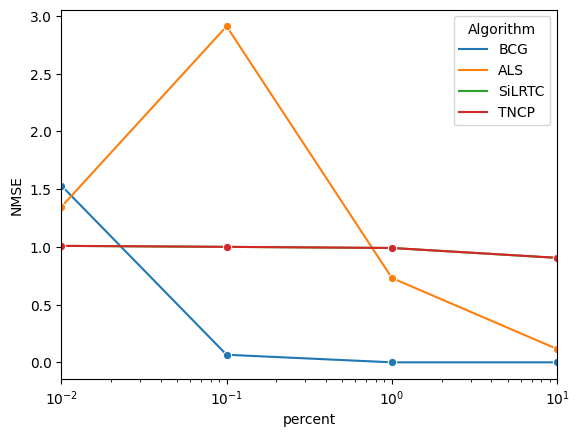

In [59]:
x=sns.lineplot(data=df1,x='percent',y='NMSE_mean',hue='Algorithm',marker='o')
x.set_xlabel('percent')
x.set_ylabel('NMSE')
x.set_xlim(0.01, 10)
x.xaxis.set_major_locator(ticker.MultipleLocator(1))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xscale('log')

In [60]:
fig=x.get_figure()
fig.savefig('fig_1c')

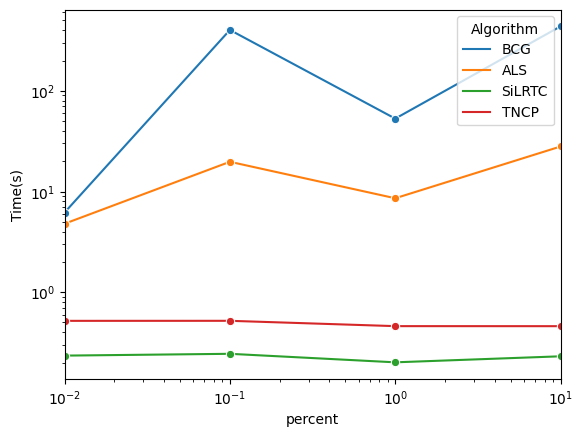

In [61]:
x=sns.lineplot(data=df1,x='percent',y='time_mean',hue='Algorithm',marker='o')
x.set_xlabel('percent')
x.set_ylabel('Time(s)')
x.set_xlim(0.01,10)
x.xaxis.set_major_locator(ticker.MultipleLocator(1))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.yscale('log')
plt.xscale('log')

In [62]:
fig=x.get_figure()
fig.savefig('fig_1g')

In [6]:
#percent2 
p2=[[1.00000000e-04, 7.37641845e-01, 3.47888181e-01, 1.83868146e+04,
  1.50219488e+03, 2.94940934e+00, 4.92873185e+00, 1.00074000e+00,
  2.84754627e+00, 1.00079663e+00, 1.04791922e+01],
  [1.00000000e-03, 6.13959788e-04, 2.83172775e-05 ,7.81600539e+02,
  2.76680673e+01, 1.28544110e+00 ,1.26576950e+01, 9.99106665e-01,
  3.18636523e+00 ,9.99121861e-01 ,1.15105101e+01],
  [1.00000000e-02 ,4.64253339e-04 ,2.37753765e-05 ,7.41039569e+02,
  1.47770364e+01, 6.84537059e-01 ,7.39208003e+01, 9.90050231e-01,
  2.71117746e+00, 9.90057152e-01, 8.45043475e+00],
 [1.00000000e-01, 4.70549382e-04, 2.31341281e-05, 4.60693897e+03,
  1.38886939e+02, 2.16624995e-01 ,8.46560413e+02, 9.04691632e-01,
  3.48893562e+00 ,9.04842901e-01 ,9.16639089e+00]
]

In [7]:
df1=pd.DataFrame(p2)
df1.columns=['percent','NMSE_mean','NMSE_se','time_mean','time_se','ALS','ALS_time','SiLRTC','SiLRTC_time','TNCP','TNCP_time']
dfa,dfb,dfc = df1[['percent','NMSE_mean','time_mean']].copy(),df1[['percent','ALS','ALS_time']].copy(),df1[['percent','SiLRTC','SiLRTC_time']].copy()
dfd=df1[['percent','TNCP','TNCP_time']].copy()
dfb.columns,dfc.columns,dfd.columns=['percent','NMSE_mean','time_mean'],['percent','NMSE_mean','time_mean'],['percent','NMSE_mean','time_mean']
dfa.loc[:,'Algorithm'],dfb.loc[:,'Algorithm'],dfc.loc[:,'Algorithm'],dfd.loc[:,'Algorithm']='BCG','ALS','SiLRTC','TNCP'
df1=pd.concat([dfa,dfb,dfc,dfd])
df1['percent']=df1['percent']*100

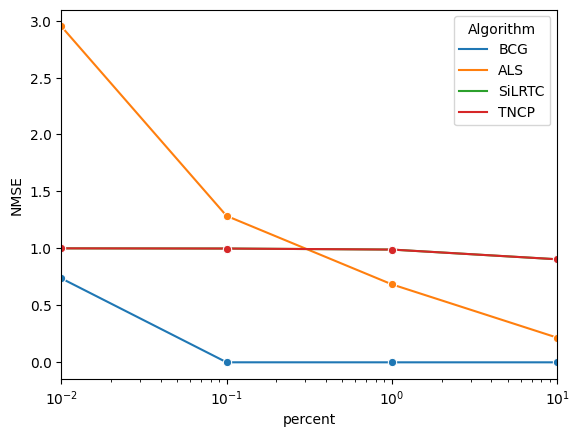

In [8]:
x=sns.lineplot(data=df1,x='percent',y='NMSE_mean',hue='Algorithm',marker='o')
x.set_xlabel('percent')
x.set_ylabel('NMSE')
x.set_xlim(0.01, 10)
x.xaxis.set_major_locator(ticker.MultipleLocator(1))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xscale('log')

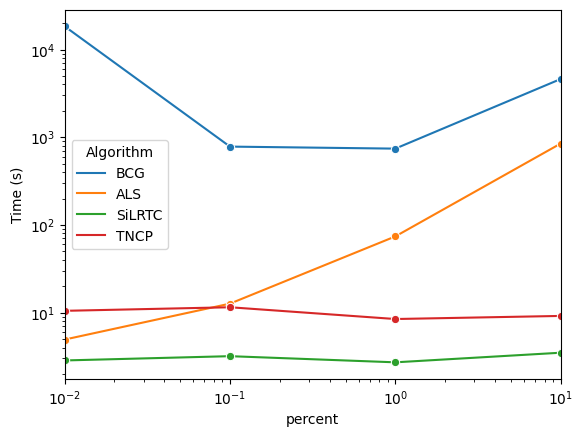

In [11]:
x=sns.lineplot(data=df1,x='percent',y='time_mean',hue='Algorithm',marker='o')
x.set_xlabel('percent')
x.set_ylabel('Time (s)')
x.set_xlim(0.01,10)
x.xaxis.set_major_locator(ticker.MultipleLocator(1))
x.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.yscale('log')
plt.xscale('log')

In [78]:
# original altmax time
r = 10 - 100, 10 reps
[[1.00000000e+01 1.12516315e+00 3.42661446e-02 9.06287766e-01
  7.00982555e-03]
 [2.00000000e+01 2.49007964e+00 7.81808831e-02 2.03450608e+00
  6.32885435e-02]
 [3.00000000e+01 3.10540898e+02 9.52820674e+01 2.86167029e+02
  8.79318964e+01]
 [4.00000000e+01 5.98085220e+02 1.80378939e+02 5.69496734e+02
  1.74597686e+02]
 [5.00000000e+01 3.43526945e+02 8.54009984e+01 3.23883231e+02
  8.18913592e+01]
 [6.00000000e+01 2.03711823e+02 7.96741592e+01 1.90517361e+02
  7.64906050e+01]
 [7.00000000e+01 4.20451052e+01 9.92172803e+00 3.62506475e+01
  8.82181736e+00]
 [8.00000000e+01 1.88468951e+01 1.55551104e+00 1.54584399e+01
  1.35465299e+00]
 [9.00000000e+01 1.55342854e+01 1.50079407e+00 1.19633762e+01
  1.00775504e+00]
 [1.00000000e+02 1.29288572e+01 1.30731647e+00 9.12599742e+00
  8.00946229e-01]]